# 使用梯度上升法求解主要成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X= np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 *X[:,0]+3.+np.random.normal(0,10,size=100)

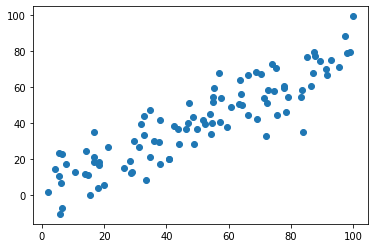

In [3]:
plt.scatter(X[:,0],X[:,1])

### DEMEAN

In [4]:
def demean(X):
    return X - np.mean(X,axis=0)

In [5]:
X_demean = demean(X)

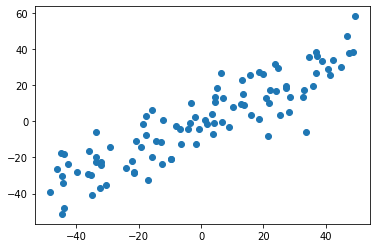

In [6]:
plt.scatter(X_demean[:,0],X_demean[:,1])

## 梯度上升法

In [15]:
def df(w,X):
    return np.sum((X.dot(w)**2)) / len(X)

In [16]:
def df_math(w,X):
    return X.T.dot(X.dot(w)) *2 /len(X)

In [22]:
def df_debug(w,X,epsilon = 0.001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] +=epsilon
        w_2=w.copy()
        w_2[i] -=epsilon
        res[i] =(f(w_1,X) - f(w_2,X)) / (2 *epsilon)
    return res

In [23]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_asent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    
    w=direction(initial_w)
    cur_iter = 0
    while cur_iter<n_iters:
        gradient = df(w,X)
        last_w = w
        w=w+eta*gradient
        w=direction(w)
        if(abs(f(w,X) - f(last_w,X))<epsilon):
            break
        cur_iter+=1
        
    return w


In [24]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.23737477, 0.20501306])

In [25]:
eta = 0.001

In [26]:
gradient_asent(df_debug,X_demean,initial_w,eta)

array([0.77315863, 0.63421269])

In [27]:
gradient_asent(df_math,X_demean,initial_w,eta)

array([0.77315863, 0.63421269])

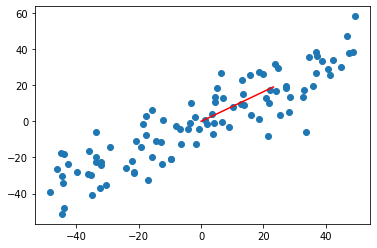

In [29]:
w = gradient_asent(df_math,X_demean,initial_w,eta)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color='r')